In [1]:
import os ,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('Data.csv')

In [3]:
dataset.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [5]:
dataset.isnull().sum()/len(dataset)*100


Ware_house_ID                    0.000
WH_Manager_ID                    0.000
Location_type                    0.000
WH_capacity_size                 0.000
zone                             0.000
WH_regional_zone                 0.000
num_refill_req_l3m               0.000
transport_issue_l1y              0.000
Competitor_in_mkt                0.000
retail_shop_num                  0.000
wh_owner_type                    0.000
distributor_num                  0.000
flood_impacted                   0.000
flood_proof                      0.000
electric_supply                  0.000
dist_from_hub                    0.000
workers_num                      3.960
wh_est_year                     47.524
storage_issue_reported_l3m       0.000
temp_reg_mach                    0.000
approved_wh_govt_certificate     3.632
wh_breakdown_l3m                 0.000
govt_check_l3m                   0.000
product_wg_ton                   0.000
dtype: float64

In [6]:
# dropping non significant variables 
data = dataset.drop(['Ware_house_ID','WH_Manager_ID','wh_est_year','wh_owner_type'],axis=1)
data.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,Urban,Small,West,Zone 6,3,1,2,4651,24,0,1,1,91,29.0,13,0,A,5,15,17115
1,Rural,Large,North,Zone 5,0,0,4,6217,47,0,0,1,210,31.0,4,0,A,3,17,5074
2,Rural,Mid,South,Zone 2,1,0,4,4306,64,0,0,0,161,37.0,17,0,A,6,22,23137
3,Rural,Mid,North,Zone 3,7,4,2,6000,50,0,0,0,103,21.0,17,1,A+,3,27,22115
4,Rural,Large,North,Zone 5,3,1,2,4740,42,1,0,1,112,25.0,18,0,C,6,24,24071


In [7]:
data['approved_wh_govt_certificate'].value_counts()

C     5501
B+    4917
B     4812
A     4671
A+    4191
Name: approved_wh_govt_certificate, dtype: int64

In [8]:
data['approved_wh_govt_certificate'] = data['approved_wh_govt_certificate'].fillna('C')

<AxesSubplot:xlabel='workers_num'>

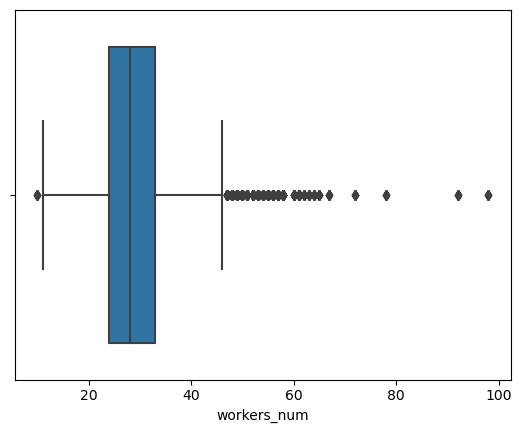

In [9]:
sns.boxplot(data['workers_num'])

In [10]:
data['workers_num'] = data['workers_num'].fillna(data['workers_num'].median())

In [11]:
data.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

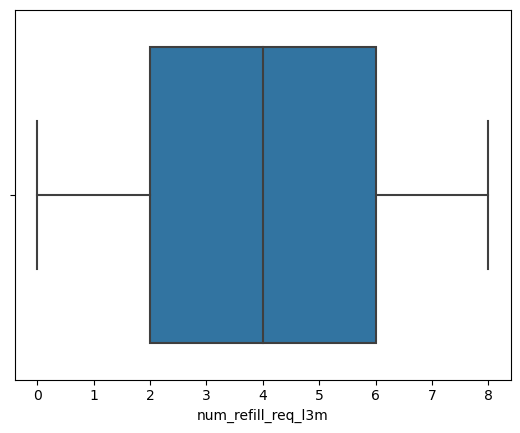

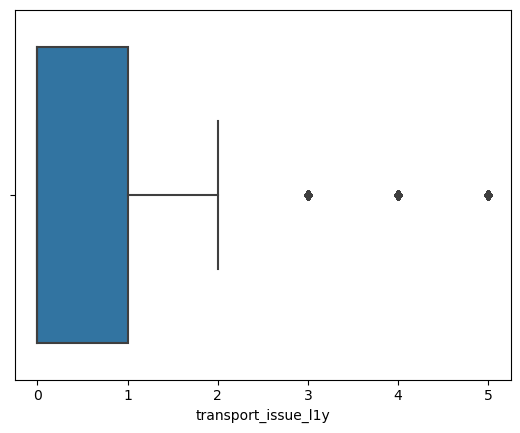

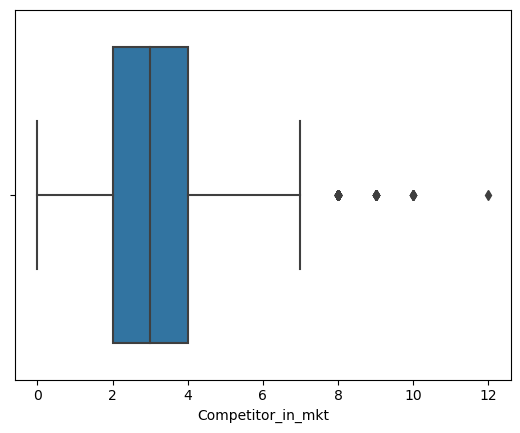

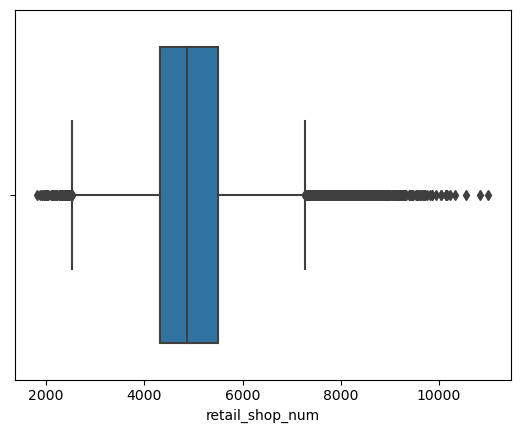

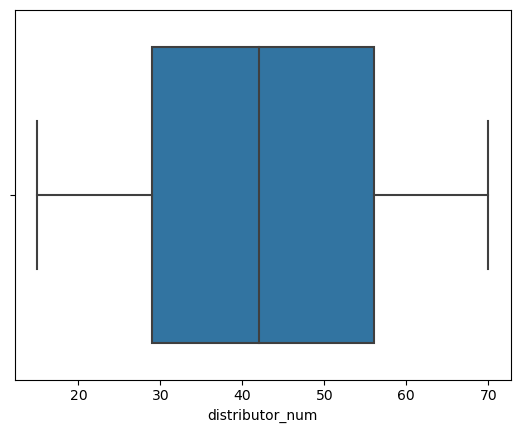

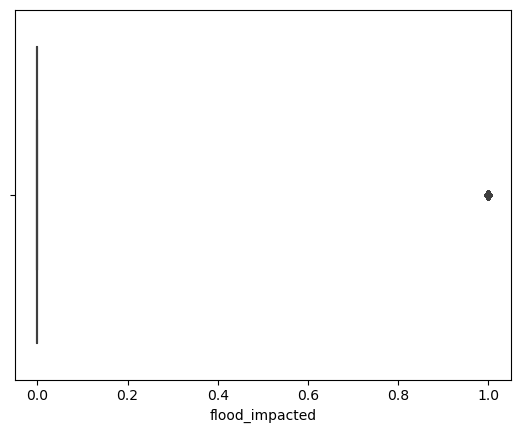

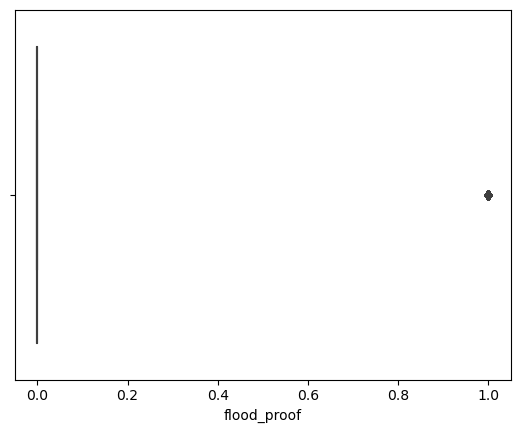

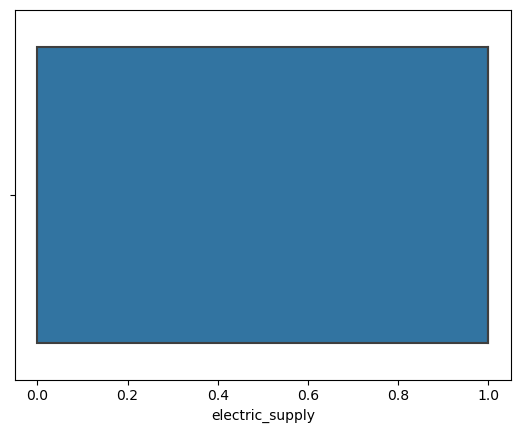

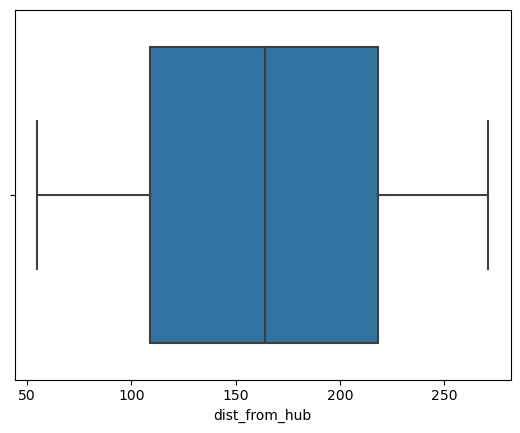

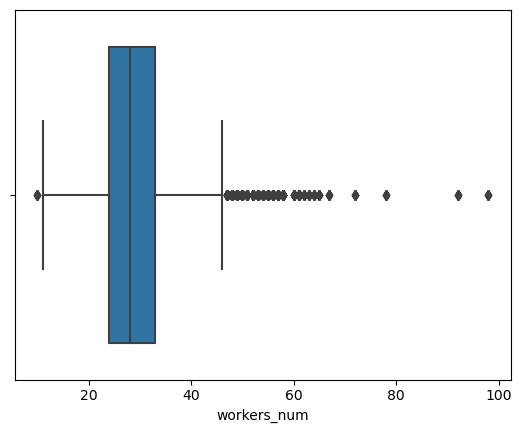

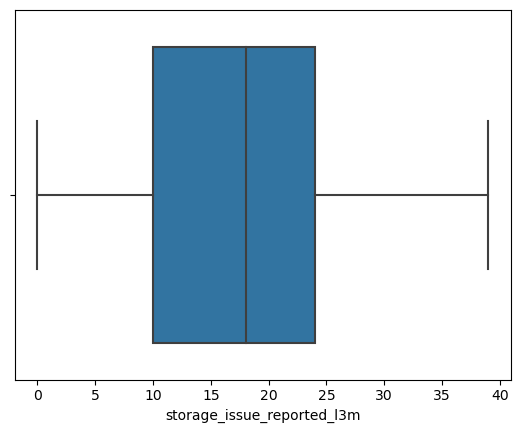

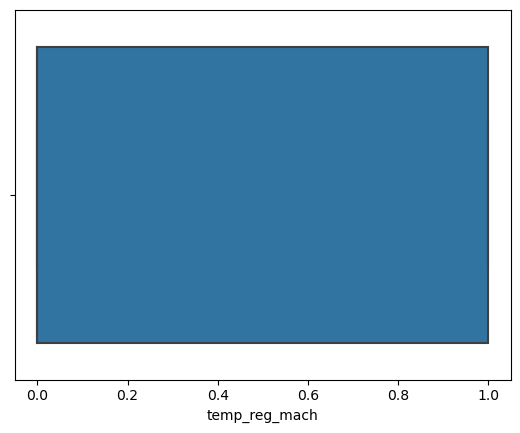

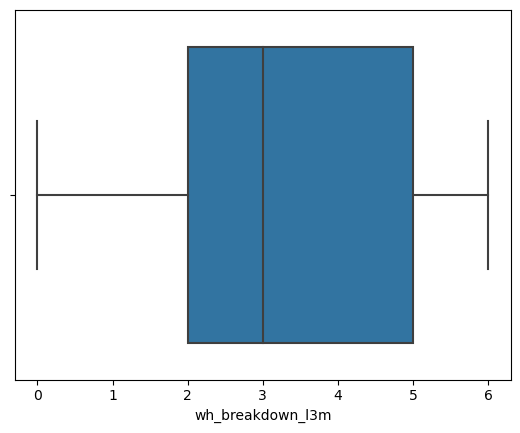

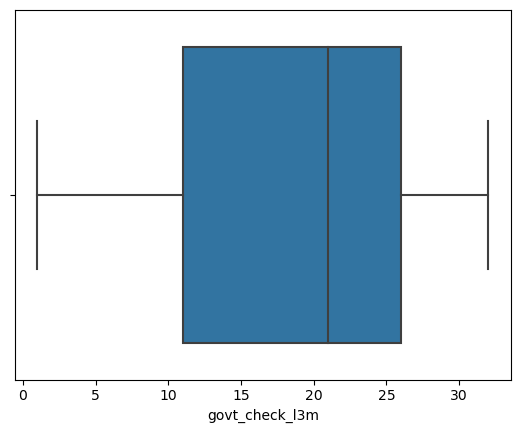

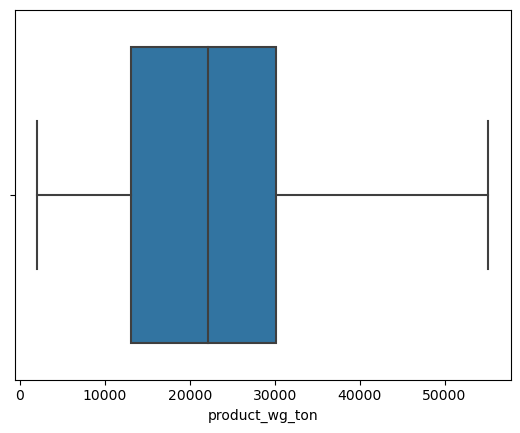

In [12]:
def boxplots(col):
    sns.boxplot(data[col])
    plt.show()
    
for i in list(data.select_dtypes(exclude=['object','category']).columns):
    boxplots(i)

In [13]:
dups = data.duplicated()
print("Number of duplicates rows = %d" %(dups.sum()))
data[dups]

Number of duplicates rows = 0


,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton


<AxesSubplot:xlabel='product_wg_ton', ylabel='Density'>

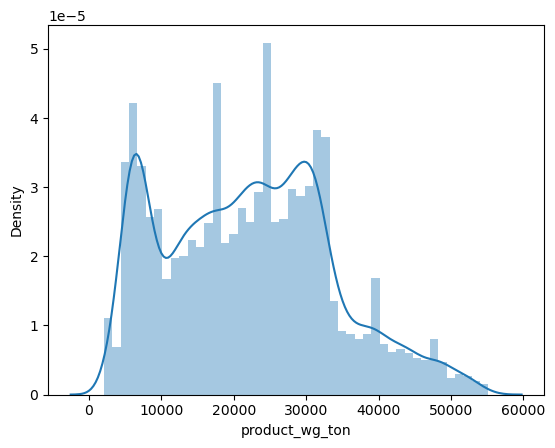

In [14]:
sns.distplot(data['product_wg_ton'])

<AxesSubplot:>

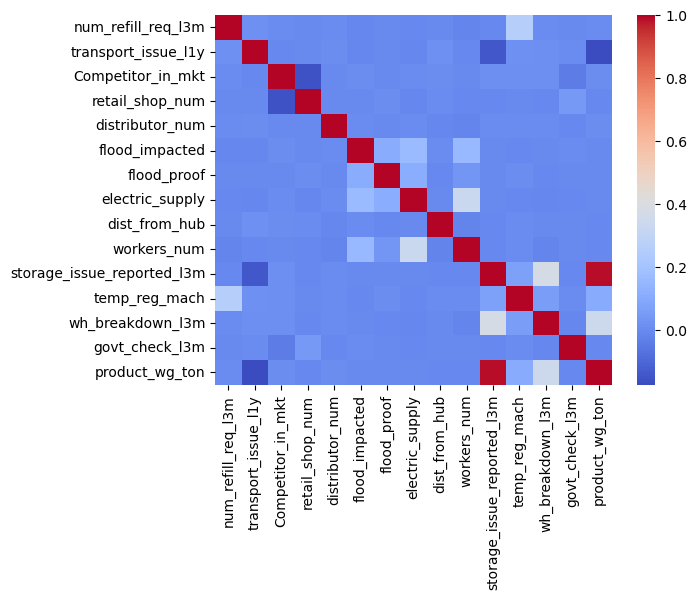

In [15]:
sns.heatmap(data.corr(),cmap = 'coolwarm')

In [16]:
#from pandas_profiling import ProfileReport

#report = ProfileReport(dataset)
#report.to_file(output_file='EDA.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
x= data.iloc[:,0:-1]

In [18]:
y = data['product_wg_ton']

In [19]:
x.head()

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m
0,Urban,Small,West,Zone 6,3,1,2,4651,24,0,1,1,91,29.0,13,0,A,5,15
1,Rural,Large,North,Zone 5,0,0,4,6217,47,0,0,1,210,31.0,4,0,A,3,17
2,Rural,Mid,South,Zone 2,1,0,4,4306,64,0,0,0,161,37.0,17,0,A,6,22
3,Rural,Mid,North,Zone 3,7,4,2,6000,50,0,0,0,103,21.0,17,1,A+,3,27
4,Rural,Large,North,Zone 5,3,1,2,4740,42,1,0,1,112,25.0,18,0,C,6,24


In [20]:
y.head()

0    17115
1     5074
2    23137
3    22115
4    24071
Name: product_wg_ton, dtype: int64

In [21]:
# One hot encoding
x = pd.get_dummies(x,columns = ['Location_type','WH_capacity_size','zone','WH_regional_zone','approved_wh_govt_certificate'],drop_first=True)

In [22]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   num_refill_req_l3m               25000 non-null  int64  
 1   transport_issue_l1y              25000 non-null  int64  
 2   Competitor_in_mkt                25000 non-null  int64  
 3   retail_shop_num                  25000 non-null  int64  
 4   distributor_num                  25000 non-null  int64  
 5   flood_impacted                   25000 non-null  int64  
 6   flood_proof                      25000 non-null  int64  
 7   electric_supply                  25000 non-null  int64  
 8   dist_from_hub                    25000 non-null  int64  
 9   workers_num                      25000 non-null  float64
 10  storage_issue_reported_l3m       25000 non-null  int64  
 11  temp_reg_mach                    25000 non-null  int64  
 12  wh_breakdown_l3m  

In [23]:
# Feature Scaling
from sklearn.preprocessing import Normalizer
x_nor = Normalizer()
x_fs = x_nor.fit_transform(x)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_fs,y,test_size=0.2,random_state=101)

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)

In [26]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [27]:
y_pred_rf_train = rf.predict(x_train)
y_pred_rf_test = rf.predict(x_test)

In [28]:
from sklearn.metrics import r2_score
r2_score(y_train,y_pred_rf_train)

0.9976195259370757

In [29]:
r2_score(y_test,y_pred_rf_test)

0.9833514875761372

In [30]:
rf.feature_importances_

array([1.55812174e-03, 2.65869482e-03, 1.84282400e-02, 2.22018038e-03,
       2.26367499e-03, 1.42232713e-04, 7.91425501e-05, 5.59063173e-02,
       1.28286869e-03, 7.51797312e-03, 8.54136099e-01, 1.38976303e-03,
       2.84099259e-03, 2.72193266e-03, 1.17054180e-04, 7.04162188e-03,
       9.93371090e-04, 6.55092929e-03, 4.07658787e-03, 5.22603556e-03,
       1.79007892e-04, 1.56351915e-04, 2.57440889e-04, 2.51427317e-03,
       4.98413983e-03, 1.12401234e-03, 6.09509785e-03, 6.65579946e-03,
       8.82042721e-04])

<AxesSubplot:>

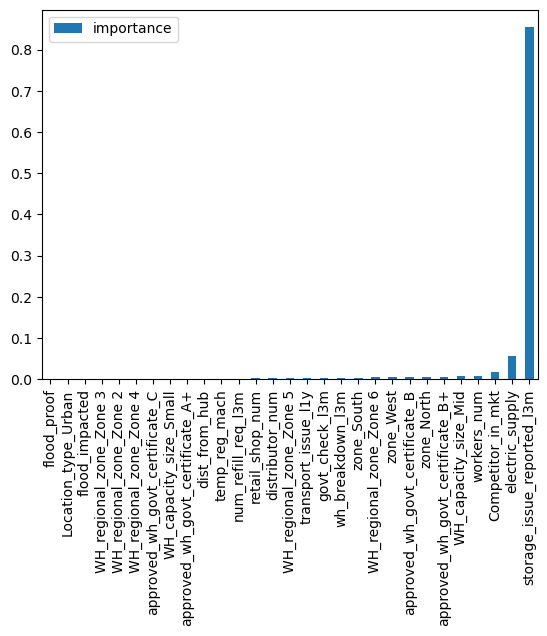

In [31]:
feature_importance = pd.DataFrame({'importance': rf.feature_importances_}, index= x.columns).sort_values('importance')
feature_importance.plot.bar()

In [32]:
# Pruning
rf2 = RandomForestRegressor(n_estimators=100,max_depth=3)
rf2.fit(x_train,y_train)

RandomForestRegressor(max_depth=3)

In [33]:
y_pred_rf2_train = rf2.predict(x_train)
y_pred_rf2_test = rf2.predict(x_test)

In [34]:
r2_score(y_test,y_pred_rf2_test)

0.8387858976766818

In [35]:
r2_score(y_train,y_pred_rf2_train)

0.83760648166243